# Recursion

Recall - A recursive function is divided into oneor  more base cases and one or more recursive or inductive cases. Together, these have a very standard structure. In pseudocode, it looks like:

In [ ]:
def recursive_function(value):
    """Always check base cases first"""
    if base case applies:
        do the base case and return
    elif another base case applies:
        do the base case and return
    else:
        """Recursive case(s) follow"""
        break value into pieces p1, p2, ...
        result1 = recursive_function(p1)
        result2 = recursive_function(p2)
        ...
        return combine(result1, result2, ...)

For example, the classic recursive factorial function can be written as a method in a class:

In [1]:
def classic_factorial(value:int) -> int:
    """We always check base cases first"""
    if value < 2:
        return 1
    else:
        """Recursive cases follow"""
        p1 = value - 1
        r1 = classic_factorial(p1)
        return value * r1

Which could typically simplify to:

In [2]:
def fact(value:int) -> int:
    if value < 2:
        return 1
    return value * fact(value - 1)

we can see the same basic structure in a binary search. Suppose we have a sorted table of (key, value) pairs that looks like this:

In [ ]:
table = [(1, "alpha"), (3, "beta"), (4, "gamma"), (9, "delta"), (12, "epsilon")]

The table is sorted by key. We can search it like this:

In [ ]:
def bin_search(key: int, table: list[tuple[int, str]]) -> [str]:
    return bin_search_range(key, table, 0, len(table) - 1)

def bin_search_range(key: int, table: list[tuple[int, str]], low: int, high: int) -> [str]:
    """Recursive binary search in range low..high inclusive."""

    """Base case 1: key not in table"""
    if low > high:
        return "No such value"
    
    mid = (high + low) // 2
    entry_key, entry_value = table[mid]

    """base case 2: Key found at midpoint in table"""
    if entry_key == key:
        return entry_value
    
    if key < entry_key:
        """Revursive case 1: Key must be before midpoint, or absent"""
        return bin_search_range(key, table, low, mid - 1)
    
    else:
        """Recursive case 2: Key must be after midpoint, or absent"""
        return bin_search_range(key, table, mid + 1, high)

# Recursive Data Structures:

A data structure can also have a recursive structure: Tuples can contain tuples, lists can contain lists, and so on. Instead of a simple list, we can make the table have four elements:

[key], [value], [smaller_key], [larger_keys]

where smaller keys and larger keys are themselves tables with the same form, lists within lists,s o that we get a tree-like structure. This is called a binary search tree, because each node has two branches, one for smaller keys and one for larger keys.

In python, this table could be represented as:

In [3]:
alpha_tree: [4, "gamma",
             [3, "beta",
              [1, "alpha", [],[]],
              []],
            [12, "epsilon",
             [9, "delta", [], []],
             [15, "zeta", [], []]]
           ]

typically,wev  isualize this structure not by drawing list cells within list cells,b ut by drawing "nested in" relation as lines. We call such a structure a tree, with the root of the tree at the top. 

- Each entry of the tree is called a node. 
- The top node is called the root.
- The nodes at the bottom of the tree are called leaves.
- The nodes in between are called internal nodes, and each of those + all the leaf nodes have a parent node.

Here, key 4 is at the root, Keys 1, 9, and 15 are in leaves,and  4, 3, and 12 are internal nodes. 

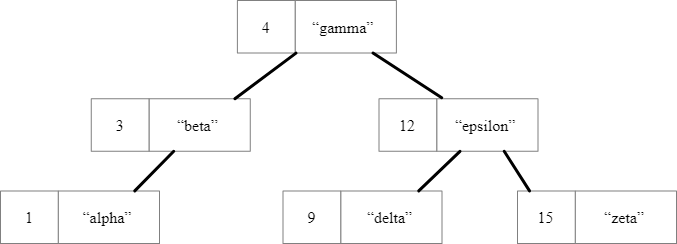

we can now rewrite our binary search as a search in the nested list structure, or tree:

In [ ]:
def nested_list_search(key: int, table: list) -> str:
    """Table is [key, value, smaller keys, larger keys]"""
    log.debug(f"search for {key} in {table}")
    """Base case one: there are no keys"""
    if table == []:
        return "no such value"
    
    entry_key, entry_value, smaller, larger = table
    """Base case two: key is found"""
    if key == entry_key:
        return entry_value
    
    if key < entry_key:
        """Recursive case one: Must be in the smaller keys"""
        return nested_list_search(key, smaller)
    else:
        """Recursive case 2: must be  in the larger keys"""
        return nested_list_search(key, larger)

notice - this is almost the same logica s our binary search in a list. The differences are now the data is shaped like an algorithm. When we searched a sorted list, we divided the list into a middle element, a sublist of smaller elements, and a sublist of larger elements. The nested list has already been divided up into a middle element (Which appears in the first key and value), a sublist of smaller elements, and a sublist of larger elements. Instead of calculating a midpoint, our `nested_search_list` just follows the data structure.

# Hierarchical Structures as Classes

We can implement the same logical structure using classes and objects! Note that when we represented the tree using nested lists, we used empty lists to to represent emptyse ts of entries with larger or smaller keys. Using classes, we can instead create a distinct subclass for an empty table.

We'll create an abstract base class for the tree structure, with a concrete subclass for a non-empty node, and a concrete subclass for an empty node.

In [ ]:
class GreekSearchTree:
    """An abstract base class for the table of Greek Letters"""
    def __init__(self):
        raise NotImplementedError("Nope, can't do that.")

class Node(GreekSearchTree):
    def __init__(self, key: int, value: str, smaller: GreekSearchTree, larger: GreekSearchTree):
        self.key = key
        self.value = value
        self.smaller = smaller  
        self.larger = larger 

class Empty(GreekSearchTree):
    def __init__(self):
        pass

with this, we can build up the tree structure:

In [ ]:
# the leaves
empty = Empty() # the empty tree - we only need one of these.
alpha = Node(1, "alpha", empty, empty)
delta = Node(9, "delta", empty, empty)
zeta = Node(15, "zeta", empty, empty)

#the internal nodes
beta = Node(3, "beta", alpha, empty)
epsilon = Node(12, "epsilon", delta, zeta)
gamma = Node(4, "gamma", beta, epsilon)

# the root (4, gamma)
tree = gamma

let's implement a search method - in the abstract base class, we will give a method definition with the header for the search method.